<a href="https://colab.research.google.com/github/Askoye/IP-Core/blob/master/Ted_Askoye_Week_4_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Notebook



## 1.) Defining the Question

### a)Specifying the Data Analytic Question


### b)Defining the Metric for Success


### c) Understanding the context


### d) Recording the Experimental Design






##2) Reading, Checking and Previewing the Data


In [50]:
# We will begin by importing the libraries that we need

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt

In [51]:
# Dataset and Glossary

# Dataset = "http://bit.ly/DSCoreAutolibDataset"
# Glossary = "http://bit.ly/DSCoreAutolibDatasetGlossary"

autolib_df = pd.read_csv("autolib_daily_events_postal_code.csv")
autolib_glossary = pd.read_excel("columns_explanation.xlsx")

In [52]:
# Previewing the the top of our dataset

autolib_df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [53]:
# Previewing the the bottom of our dataset

autolib_df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [54]:
# Previewing the Glossary

autolib_glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [55]:
# Checking the shape of our data

autolib_df.shape

# Our dataset has 16085 records and 13 columns

(16085, 13)

In [56]:
# check the columns that are in our dataset
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [57]:
# # Checking the dataset information
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [58]:
# check for unique values in our Autolib dataset
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [59]:
#  Checking this for specific columns
autolib_df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [60]:
autolib_df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [61]:
autolib_df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

## 4. External Data Source Validation
This dataset was validated with an external source that is reliable.  Autolib is operated by the Bolloré Group enterprise, which won
the contract to develop the service and to supply the area with electric cars and stations. 

## 5. Tidying the Dataset

In [62]:
#Converting Postal Code and day of the week to String from Numerical to prevent crucial data from being removed during cleaning

autolib_df["Postal code"] = autolib_df["Postal code"].astype(int).astype(str)
autolib_df["dayOfWeek"] = autolib_df["dayOfWeek"].astype(int).astype(str)

In [63]:
# Checking to see if changes were effected
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  object
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  object
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.6+ MB


In [64]:
# Checking for null values

autolib_df.isnull().sum()

# We have no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [65]:
# Aligning the columns in our dataset to fill in empty spaces 

autolib_df.columns = autolib_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib_df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


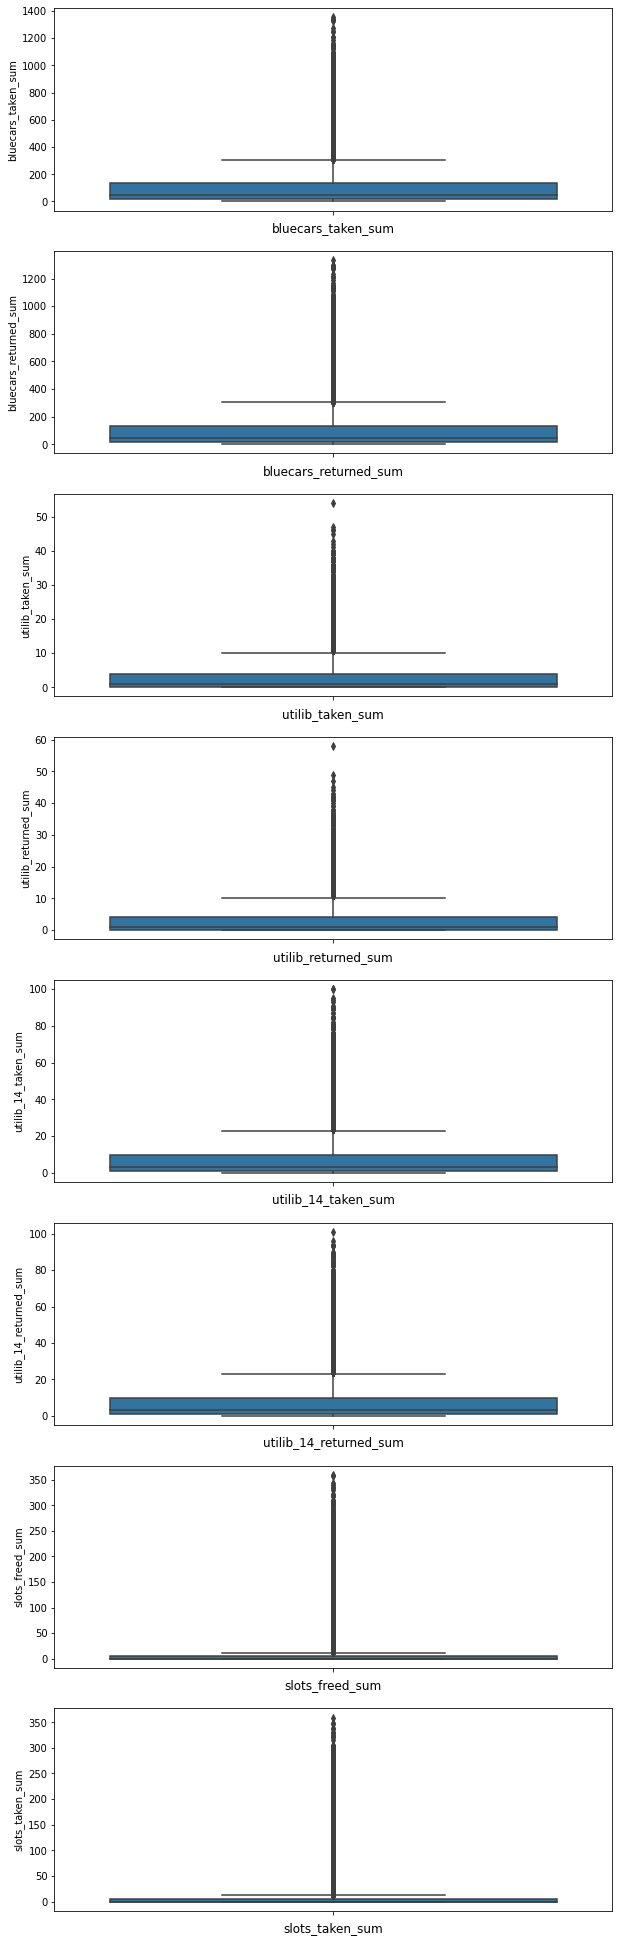

In [66]:
#checking and dealing with outliers 

col_names= ['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,35))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=autolib_df[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()


The box plot indicates that the data seems to be skewed to the right with the 3 variables year,household size and the respondent age having outliers. This could have been as a result of entry errors eg. for year we have entries for 2029, 2056 and 2039 which is incorrect. For household size, we have those outside the range from 10-above 20 and for respondent age we have outliers of respondent aged above 85

In [67]:
#We will go ahead to remove the outliers in our dataset as its clear some of them could have been caused by entry errors
Q1 = autolib_df.quantile(0.25)
Q3 = autolib_df.quantile(0.75)
IQR = Q3 - Q1
autolib_df_out = autolib_df[~((autolib_df < (Q1 - 1.5 * IQR)) | (autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(autolib_df)
print(autolib_df_out)

      postal_code       date  ...  slots_freed_sum slots_taken_sum
0           75001   1/1/2018  ...               22              20
1           75001   1/2/2018  ...               23              22
2           75001   1/3/2018  ...               27              27
3           75001   1/4/2018  ...               25              21
4           75001   1/5/2018  ...               18              20
...           ...        ...  ...              ...             ...
16080       95880  6/15/2018  ...                0               0
16081       95880  6/16/2018  ...                0               0
16082       95880  6/17/2018  ...                0               0
16083       95880  6/18/2018  ...                0               0
16084       95880  6/19/2018  ...                0               0

[16085 rows x 13 columns]
      postal_code       date  ...  slots_freed_sum slots_taken_sum
22          75001  1/23/2018  ...               11               9
29          75001  1/30/2018  ...  

In [68]:
print("The Dataset with Outliers is : ", autolib_df.shape)
print("xxxx"*20)
print("The Dataset without Outliers is : ", autolib_df_out.shape)

The Dataset with Outliers is :  (16085, 13)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The Dataset without Outliers is :  (10439, 13)


## 6. Exploratory Analysis
a)Univariate analysis

In [69]:
# Checking for statistical summaries of our cleaned data:

autolib_df_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_daily_data_points,10439.0,1439.698534,0.564849,1438.0,1440.0,1440.0,1440.0,1440.0
bluecars_taken_sum,10439.0,47.961682,45.384376,0.0,16.0,33.0,65.0,293.0
bluecars_returned_sum,10439.0,47.932944,45.282542,0.0,16.0,33.0,63.0,301.0
utilib_taken_sum,10439.0,1.463167,1.881414,0.0,0.0,1.0,2.0,10.0
utilib_returned_sum,10439.0,1.458760,1.863466,0.0,0.0,1.0,2.0,10.0
utilib_14_taken_sum,10439.0,3.465179,3.830314,0.0,1.0,2.0,5.0,23.0
utilib_14_returned_sum,10439.0,3.467286,3.833058,0.0,1.0,2.0,5.0,23.0
slots_freed_sum,10439.0,0.717885,1.840033,0.0,0.0,0.0,0.0,12.0
slots_taken_sum,10439.0,0.715203,1.834457,0.0,0.0,0.0,0.0,12.0


In [70]:
# Skewness
pd.DataFrame.from_dict(dict(
    {
        'bluecars_taken': autolib_df_out.bluecars_taken_sum.skew(), 
        'bluecars_returned': autolib_df_out.bluecars_returned_sum.skew(), 
        'utilib_taken': autolib_df_out.utilib_taken_sum.skew(),
        'utilib_returned_returned': autolib_df_out.utilib_returned_sum.skew(),
        'slots_feed': autolib_df_out.slots_freed_sum.skew(),
        'slots_taken': autolib_df_out.slots_taken_sum.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
bluecars_taken,1.851170
bluecars_returned,1.860630
utilib_taken,1.679776
utilib_returned_returned,1.682364
slots_feed,3.126425
slots_taken,3.110729


In [71]:
#Slots,Bluecars and the utilib cars Taken and Returned: Value is high and hence right skewed as shown in the plot above.

In [72]:
# Kurtosis 
pd.DataFrame.from_dict(dict(
    {
        'bluecars_taken': autolib_df_out.bluecars_taken_sum.kurt(), 
        'bluecars_returned': autolib_df_out.bluecars_returned_sum.kurt(), 
        'utilib_taken': autolib_df_out.utilib_taken_sum.kurt(),
        'utilib_returned_returned': autolib_df_out.utilib_returned_sum.kurt(),
        'slots_feed': autolib_df_out.slots_freed_sum.kurt(),
        'slots_taken': autolib_df_out.slots_taken_sum.kurt()
    }), orient='index', columns=['Kurtosis'])

,Kurtosis
bluecars_taken,4.239283
bluecars_returned,4.264400
utilib_taken,2.830660
utilib_returned_returned,2.880134
slots_feed,10.423053
slots_taken,10.234651


In [73]:
#  : Values is close to 0, hence uniformly distributed as shown in the plot above.
# Slots taken/Returned and Utilib and Bluecars Taken/Returned : Value is high and is Leptokurtic which indicates a positive excess kurtosis with heavy tails on either side, indicating large outliers.

In [74]:
autolib_df_out.corr()

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
n_daily_data_points,1.000000,0.003204,0.004937,0.011772,0.010806,0.011819,0.016175,0.000662,-0.000301
bluecars_taken_sum,0.003204,1.000000,0.991863,0.623262,0.621566,0.750197,0.745404,0.287352,0.284604
bluecars_returned_sum,0.004937,0.991863,1.000000,0.625626,0.623501,0.752919,0.748883,0.284326,0.284422
utilib_taken_sum,0.011772,0.623262,0.625626,1.000000,0.896100,0.502973,0.494374,0.186579,0.185841
utilib_returned_sum,0.010806,0.621566,0.623501,0.896100,1.000000,0.506172,0.498136,0.185583,0.185218
utilib_14_taken_sum,0.011819,0.750197,0.752919,0.502973,0.506172,1.000000,0.947928,0.202606,0.201341
utilib_14_returned_sum,0.016175,0.745404,0.748883,0.494374,0.498136,0.947928,1.000000,0.198484,0.199852
slots_freed_sum,0.000662,0.287352,0.284326,0.186579,0.185583,0.202606,0.198484,1.000000,0.984708
slots_taken_sum,-0.000301,0.284604,0.284422,0.185841,0.185218,0.201341,0.199852,0.984708,1.000000


Obervations based on pair plot and correlation table
There is a high positive correlation between Utilib 14 and BlueCars taken
Slots have little to no correlation with the cars taken or returned


Text(0.5, 0, 'Postal Code')

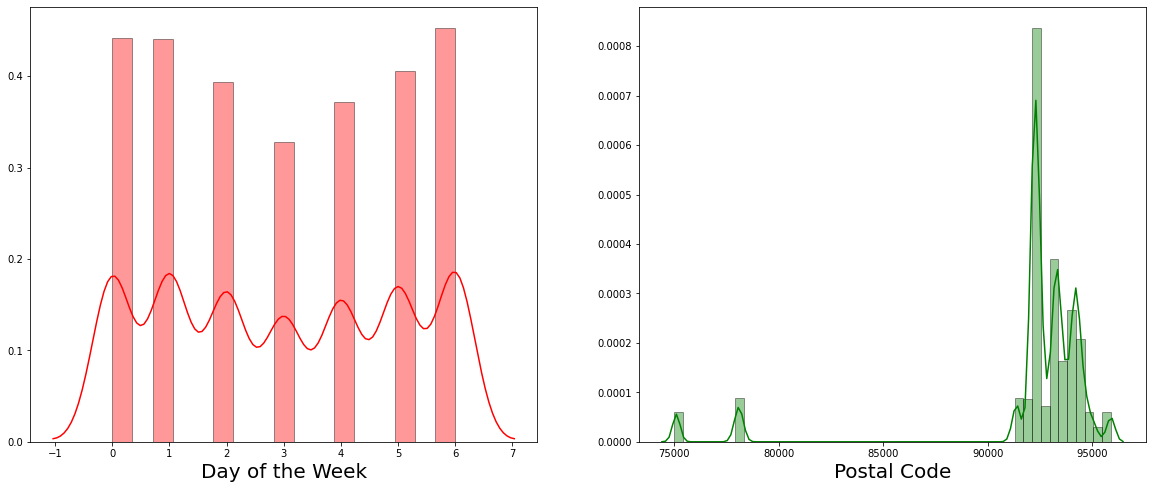

In [75]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))
dayofweek = sns.distplot(autolib_df_out['dayofweek'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
dayofweek.set_xlabel("Day of the Week",fontsize=20)

postal_code = sns.distplot(autolib_df_out['postal_code'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
postal_code.set_xlabel("Postal Code",fontsize=20)


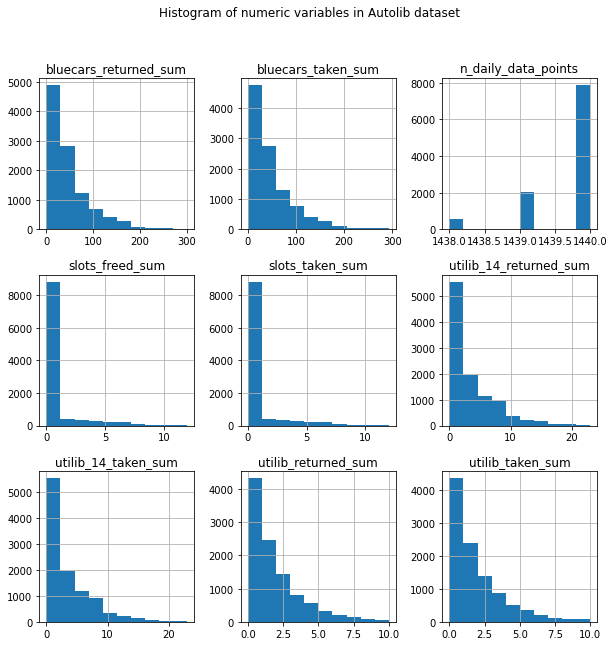

In [162]:
# Plotting our numerical variables on histogram to assess the relationship
autolib_df_out.drop(['postal_code','dayofweek','day_type'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in Autolib dataset")
plt.savefig('Autolib Histogram')
plt.show()

Based on the histograms above we can see the kinds of distributions that exist among the variables in the dataset. All distributions except the n_daily_data_points seem to follow a positive skewed distribution.

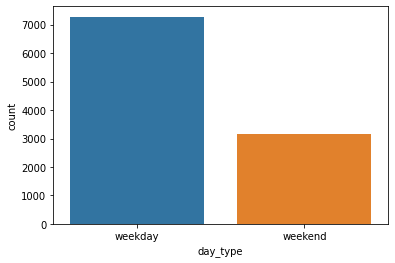

In [77]:
# Plotting the count of type of days of the week
sns.countplot(autolib_df_out['day_type'])

The key objective of our solution is to be able to predict which individuals are most likely to have or use a bank account. The dataset shows that most entries represent individuals who did not have a bank account. Therefore if we use the dataset as is, this may result to having a model with a bias.

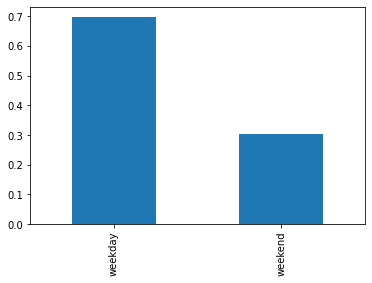

In [78]:
# Plotting type of days of the week by percentage
(autolib_df_out['day_type'].value_counts()/len(autolib_df_out)).plot.bar()

# The Weekdays were 70% & Weekends were 30% 

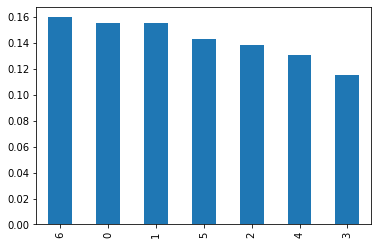

In [79]:
(autolib_df_out['dayofweek'].value_counts()/len(autolib_df_out)).plot.bar()

We found out that Sunday, Monday, Tuesday had the highest frequencies of data respectively.

In [81]:
autolib_df_out_copy = autolib_df_out.copy()
autolib_df_out_copy.postal_code.value_counts()

92260    130
95870    130
91330    130
93360    130
94110    130
        ... 
92800     82
93390     72
92130     65
75001      6
92100      4
Name: postal_code, Length: 85, dtype: int64

In [82]:
autolib_df_out_copy.day_type.value_counts()

weekday    7276
weekend    3163
Name: day_type, dtype: int64

In [83]:
autolib_df_out_copy.dayofweek.value_counts()

6    1669
0    1627
1    1623
5    1494
2    1450
4    1368
3    1208
Name: dayofweek, dtype: int64

In [84]:
autolib_df_out_copy.n_daily_data_points.value_counts()

1440    7858
1439    2015
1438     566
Name: n_daily_data_points, dtype: int64

#### Answer questions based on Statistical Evidence


1.) Is A Sample of Bluecars taken From the Autolib dataset

In [163]:
bluecars_taken_sum = autolib_df_out['bluecars_taken_sum']
mu = bluecars_taken_sum.mean()
sigma = bluecars_taken_sum.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  47.961682153462974 , sigma: 45.382202168602525


We take a sample of N=10 bluecars_taken which yields a sample mean of x_bar = 50. 
Is this sample from the Autolib dataset?

H0: The sample is from the Autolib Dataset, x_bar = μ.

HA: The sample is not from the Autolib dataset, x_bar != (not equal) μ.

In [165]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 50
N = 10
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

0.1420320452163074


Since z_stat is more than z_critical we accept the null hypothesis and reject the althernative. 

a.) Do all the cars taken differ significantly, the same

State null hypothesis
H0 : Proportion of All cars taken are similar

State alternate hypothesis
H1 : Proportion of all cars taken are significantly different in different car models

In [167]:
#get the cars based on taken samples
bluecars_taken = autolib_df_out.bluecars_taken_sum
utilib_cars_taken = autolib_df_out.utilib_taken_sum
utilib_14_cars_taken = autolib_df_out.utilib_14_taken_sum

#Since there are multiple samples and we need to check the variances of multiple samples, choosing ANOVA testing for this

f_stat, p_value = stats.f_oneway(bluecars_taken,utilib_cars_taken ,utilib_14_cars_taken )


# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**,\n We reject the Null Hypothesis.\n Hence ** All the cars taken differ significantly**')
else:
    print(f'As the p_value **({p_value}) > 0.05**,\n We fail to reject Null Hypothesis.\n Hence **All the cars taken are the same**')

As the p_value **(0.0) < 0.05**,
 We reject the Null Hypothesis.
 Hence ** All the cars taken differ significantly**


b.) Do all the cars returned differ significantly, the same

State null hypothesis
H0 : Proportion of All cars returned are similar

State alternate hypothesis
H1 : Proportion of all cars returned are significantly different in different car models

In [141]:
#get the cars based on returned samples
bluecars_returned = autolib_df_out.bluecars_returned_sum
utilib_cars_returned = autolib_df_out.utilib_returned_sum
utilib_14_cars_returned = autolib_df_out.utilib_14_returned_sum

#Since there are multiple samples and we need to check the variances of multiple samples, choosing ANOVA testing for this

f_stat, p_value = stats.f_oneway(bluecars_returned,utilib_cars_returned ,utilib_14_cars_returned )


# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**,\n We reject the Null Hypothesis.\n Hence **Slots taken by all the cars returned differ significantly**')
else:
    print(f'As the p_value **({p_value}) > 0.05**,\n We fail to reject Null Hypothesis.\n Hence **Slots taken by all the cars returned are the same**')

As the p_value **(0.0) < 0.05**,
 We reject the Null Hypothesis.
 Hence **Slots taken by all the cars returned differ significantly**


c.) Utilib cars taken differ significantly from Utilib14 Cars taken

State null hypothesis
H0 : Proportion of Utilib cars taken are similar to the Utilib 14 cars taken

State alternate hypothesis
H1 : Proportion of Utilib cars taken are significantly different in Utilib14 cars taken

In [140]:
X = np.array(autolib_df_out.utilib_taken_sum) #Utilib Taken
Y = np.array(autolib_df_out.utilib_14_taken_sum) #Utilib 14 cars Taken

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**,\n We reject the Null Hypothesis.\n Hence **Utilib cars taken differ significantly from Utilib14 Cars taken**')
    print('xxx'*20)
else:
    print(f'As the p_value **({p_value}) > 0.05**,\n We fail to reject Null Hypothesis.\n Hence **Utilib cars taken are similar to Utilib14 Cars taken**')
    print('xxx'*20)

As the p_value **(0.0) < 0.05**,
 We reject the Null Hypothesis.
 Hence **Utilib cars taken differ significantly from Utilib14 Cars taken**
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


d.) Do the Bluecars taken on Sunday differ significantly from the Utilib cars taken on the same day





State null hypothesis
H0 : Proportion of Bluecars taken on Sunday are similar

State alternate hypothesis
H1 : Proportion of Blucars taken on Sunday are significantly different to the Utilib cars taken on the same day

In [144]:
X = np.array(autolib_df_out[autolib_df_out.dayofweek == '6'].bluecars_taken_sum) #Bluecars Taken
Y = np.array(autolib_df_out[autolib_df_out.dayofweek == '6'].utilib_taken_sum) #Utilib cars Taken

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**,\n We reject the Null Hypothesis.\n Hence **Bluecars taken on Sunday differ significantly from Utilib Cars taken**')
    print('xxx'*20)
else:
    print(f'As the p_value **({p_value}) > 0.05**,\n We fail to reject Null Hypothesis.\n Hence **Bluecars taken on Sunday do not differ significantly from Utilib Cars taken**')
    print('xxx'*20)

As the p_value **(0.0) < 0.05**,
 We reject the Null Hypothesis.
 Hence **Bluecars taken on Sunday differ significantly from Utilib Cars taken**
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


e.) Do the Bluecars taken at Postal Code 92260 differ significantly from the Utilib cars taken from the same Postal Code 


State null hypothesis
H0 : Proportion of Bluecars taken at Postal Code 92260 are similar to the Utilib cars taken at the same post

State alternate hypothesis
H1 : Proportion of Bluecars taken at Postal Code 92260 are significantly different to the Utilib cars taken from the same post

In [145]:
X = np.array(autolib_df_out[autolib_df_out.postal_code == '92260'].bluecars_taken_sum) #Bluecars Taken
Y = np.array(autolib_df_out[autolib_df_out.postal_code == '92260'].utilib_taken_sum) #Utilib cars Taken

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**,\n We reject the Null Hypothesis.\n Hence **Bluecars taken at Postal Code 92260 differ significantly from Utilib Cars taken from the same post**')
    print('xxx'*20)
else:
    print(f'As the p_value **({p_value}) > 0.05**,\n We fail to reject Null Hypothesis.\n Hence **Bluecars taken at Postal Code 92260 do not differ significantly from Utilib Cars taken from the same post**')
    print('xxx'*20)

As the p_value **(6.101742390118775e-112) < 0.05**,
 We reject the Null Hypothesis.
 Hence **Bluecars taken at Postal Code 92260 differ significantly from Utilib Cars taken**
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


f.) - Null Hypothesis (Ho): The bluecars taken and utilib cars taken are not correlated at all ;
- Test statistics: Pearson correlation;
- P-value: The probability of finding values as similar to the observed Pearson correlation or higher;

In [80]:
# To start off we will find the correlation coefficient for the numerical variables:

print(autolib_df_out['bluecars_taken_sum'].corr(autolib_df_out['utilib_taken_sum']))

# with a correlation coefficient of 0.62, we can conclude that 
# the relationship between the two variables is very strong

0.6232621304570943


Pearson correlation = 0.623262130457085


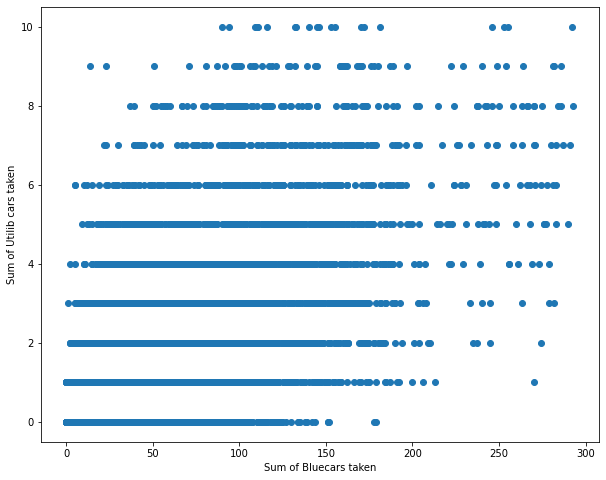

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(x=autolib_df_out['bluecars_taken_sum'], y=autolib_df_out['utilib_taken_sum']);
plt.xlabel('Sum of Bluecars taken')
plt.ylabel('Sum of Utilib cars taken')

# Compute observed correlation: obs_corr_1975
car_corr = autolib_df_out[['bluecars_taken_sum', 'utilib_taken_sum']].corr().iloc[0, 1]
print("Pearson correlation =", car_corr)

The scatterplot suggests a definite relationship between Bluecars and Utilib cars, with larger
values of Utilib Cars tending to be associated with larger values of blue cars.
There appears to be a somewhat positive correlation between the two variables.
We also note that there appears to be a linear relationship between the two variables.